In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from astropy.table import Table

In [2]:
sources = pd.read_csv('/home/machado.35/projects/intro/scripts/sources.csv')
sources = list(sources['sources'])

res_list = [60,90,120,150]
fp = '/data/rubin/machado.35/phangs/rand_results/final_run/'

MEAN NUM NEIGHBORS WITHIN 100pc:
REAL: 0.44711996535296666
2D COVERAGE: 0.038228110105159696
EXPONENTIAL: 0.09287544578211526


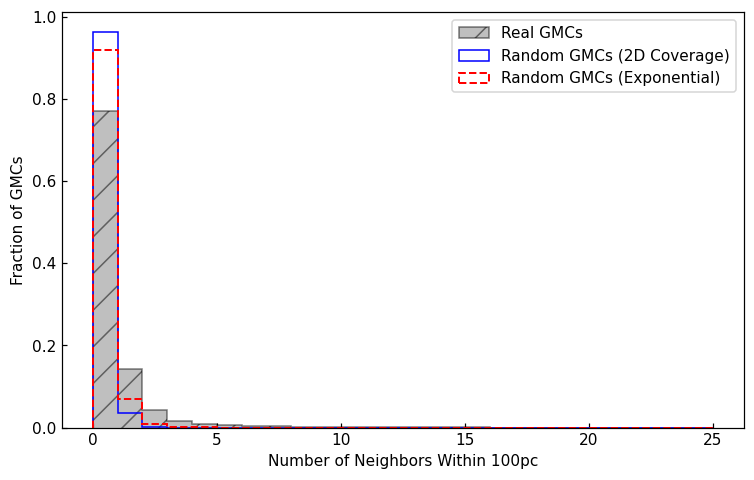

MEAN NUM NEIGHBORS WITHIN 200pc:
REAL: 1.4615851017756605
2D COVERAGE: 0.15157974812004035
EXPONENTIAL: 0.3693801123282809


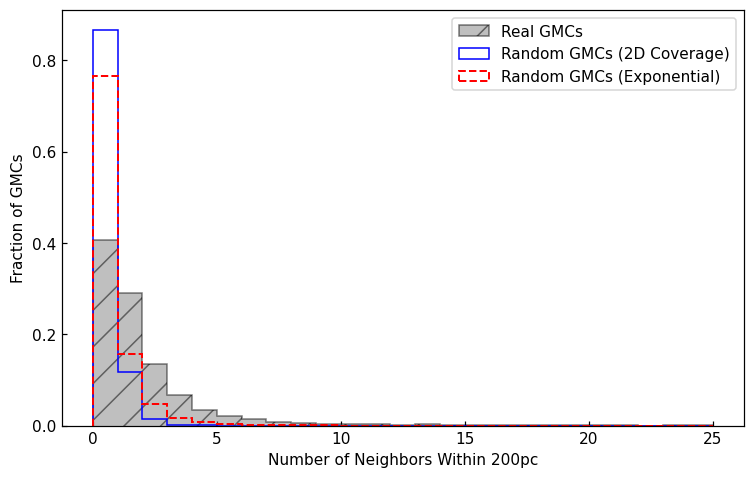

MEAN NUM NEIGHBORS WITHIN 400pc:
REAL: 5.317106972715461
2D COVERAGE: 0.5945155304935256
EXPONENTIAL: 1.463961770840634


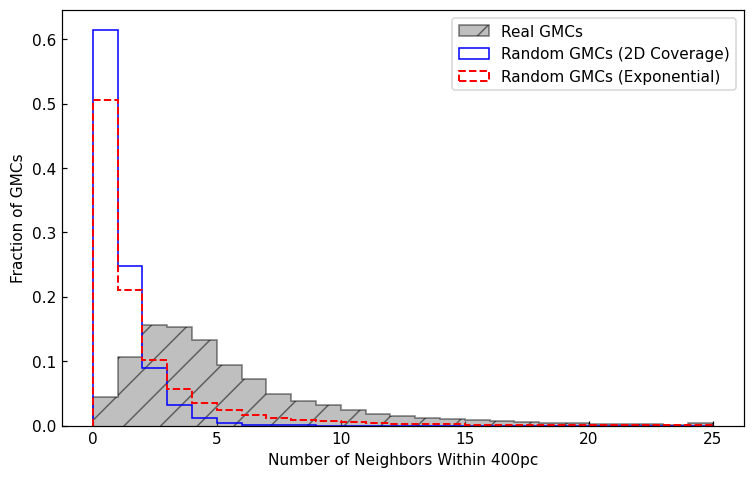

MEAN NUM NEIGHBORS WITHIN 600pc:
REAL: 10.383889129493287
2D COVERAGE: 1.315919474156421
EXPONENTIAL: 3.2601579547284976


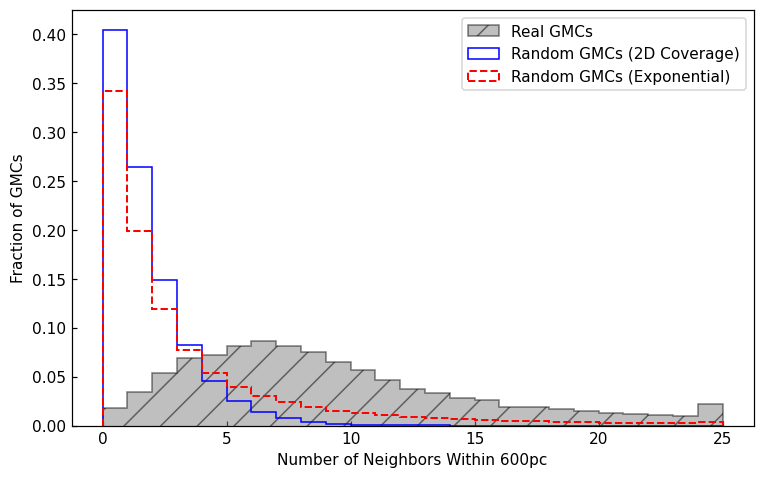

MEAN NUM NEIGHBORS WITHIN 800pc:
REAL: 16.454915547856213
2D COVERAGE: 2.294494110819149
EXPONENTIAL: 5.692809703038717


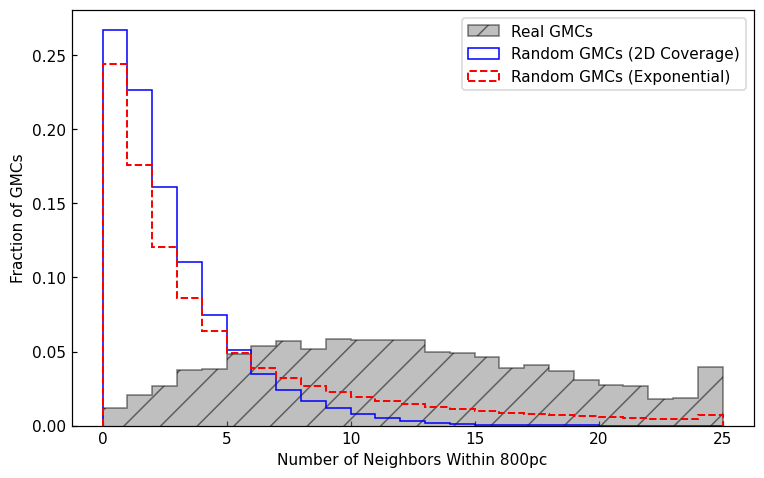

MEAN NUM NEIGHBORS WITHIN 1000pc:
REAL: 23.33391078388913
2D COVERAGE: 3.5191620669289
EXPONENTIAL: 8.724024373999155


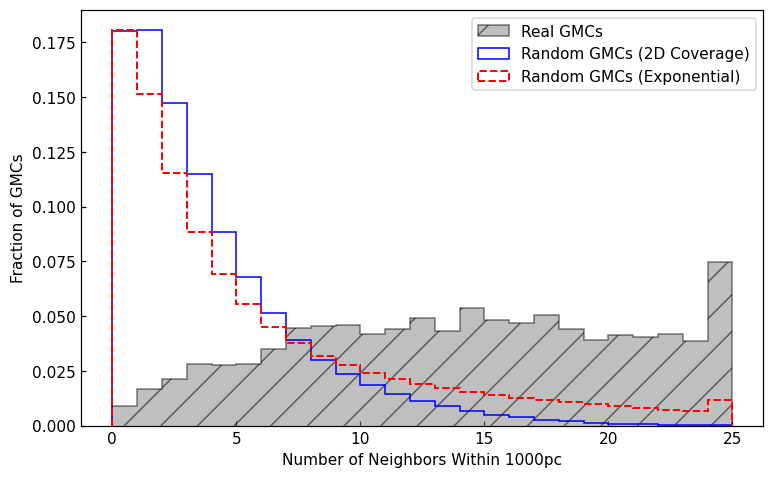

MEAN NUM NEIGHBORS WITHIN 1500pc:
REAL: 43.24538761368558
2D COVERAGE: 7.548439917321533
EXPONENTIAL: 18.466133789761756


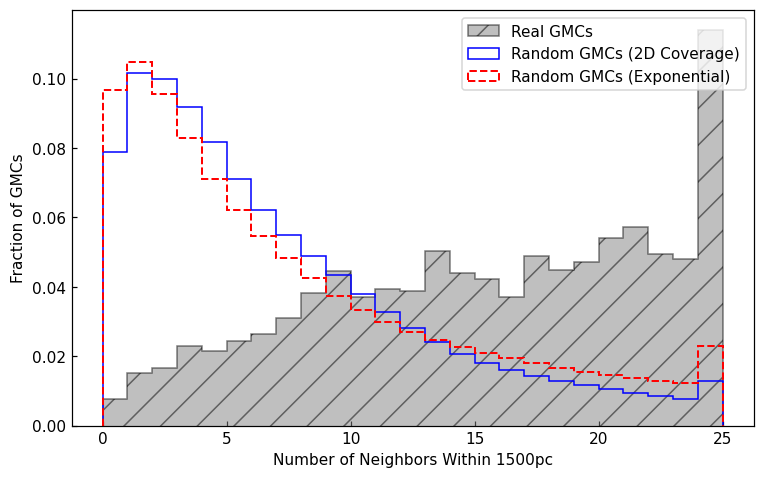

In [4]:
res = 150
radii = [100,200,400,600,800,1000,1500]
for ii in range(len(radii)):
    nc_real = []
    nc_exp = []
    nc_cov = []
    for i in range(len(sources)):
        real_data = '/home/machado.35/projects/intro/sources/'+sources[i]+'/'+sources[i]+'_'+str(res)+'pc_cloud_stats.csv'
        rand_2d = fp+sources[i]+'_2dcov'+'_'+str(res)+'pc.csv'
        rand_exp = fp+sources[i]+'_exp'+'_'+str(res)+'pc.csv'
        if os.path.isfile(real_data) and os.path.isfile(rand_exp):
            real_data = pd.read_csv(real_data)
            rand_2d = pd.read_csv(rand_2d)
            rand_exp = pd.read_csv(rand_exp)
            
            col_label = 'clouds_r'+str(radii[ii])+'pc'
            
            real_dist = real_data['min_dist']
            real_nc = real_data[col_label] #neighbor counts
            rand_2d_dist = rand_2d['nn_dist']
            rand_2d_nc = rand_2d[col_label]
            rand_exp_dist = rand_exp['nn_dist']
            rand_exp_nc = np.array(rand_exp[col_label])
            nc_real.extend(real_nc)
            nc_exp.extend(rand_exp_nc)
            nc_cov.extend(rand_2d_nc)
    ncreal = np.array(nc_real)
    ncexp = np.array(nc_exp)
    nccov = np.array(nc_cov)
    bins = np.linspace(0,25,26)
    plt.figure(dpi=110, figsize=(8,5))
    plt.hist(ncreal, bins=bins, density=True, histtype='step', facecolor='grey', hatch='/', edgecolor='black', alpha=0.5, fill=True, label='Real GMCs')
    plt.hist(nccov, bins=bins, density=True, histtype='step', edgecolor='blue', alpha=1, label='Random GMCs (2D Coverage)')
    plt.hist(ncexp, bins=bins, density=True, label='Random GMCs (Exponential)', linewidth=1.3, ls='--' ,histtype='step', edgecolor='red')
    plt.legend()
    plt.ylabel('Fraction of GMCs')
    plt.xlabel('Number of Neighbors Within '+str(radii[ii])+'pc')
    plt.tick_params(direction='in')
    print('MEAN NUM NEIGHBORS WITHIN '+str(radii[ii])+'pc:')
    print('REAL: '+str(np.nanmean(ncreal)))
    print('2D COVERAGE: '+str(np.nanmean(nccov)))
    print('EXPONENTIAL: '+str(np.nanmean(ncexp)))
    plt.savefig('/home/machado.35/papers/gmc_spacing/neighbor_density_'+str(radii[ii])+'pc.pdf')
    plt.show()

In [4]:
res = 150
min_dist = []
real_first, real_third, real_fifth = [], [], []
exp_first, exp_third, exp_fifth = [], [], []
cov_first, cov_third, cov_fifth = [], [], []
for i in range(len(sources)):
    real_data = '/home/machado.35/projects/intro/sources/'+sources[i]+'/'+sources[i]+'_'+str(res)+'pc_cloud_stats.csv'
    rand_2d = fp+sources[i]+'_2dcov'+'_'+str(res)+'pc.csv'
    rand_exp = fp+sources[i]+'_exp'+'_'+str(res)+'pc.csv'
    if os.path.isfile(real_data) and os.path.isfile(rand_exp):
        real_data = pd.read_csv(real_data)
        rand_2d = pd.read_csv(rand_2d)
        rand_exp = pd.read_csv(rand_exp)

        real_min_dist = real_data['min_dist']
        real_dist = real_data['nn_dist']
        real_dist3 = real_data['nn3_dist']
        real_dist5 = real_data['nn5_dist']
        rand_2d_dist = rand_2d['nn_dist']
        rand_2d_dist3 = rand_2d['nn3_dist']
        rand_2d_dist5 = rand_2d['nn5_dist']
        rand_exp_dist = rand_exp['nn_dist']
        rand_exp_dist3 = rand_exp['nn3_dist']
        rand_exp_dist5 = rand_exp['nn5_dist']
        
        min_dist.extend(real_min_dist)
        real_first.extend(real_dist)
        real_third.extend(real_dist3)
        real_fifth.extend(real_dist5)
        exp_first.extend(rand_exp_dist)
        exp_third.extend(rand_exp_dist3)
        exp_fifth.extend(rand_exp_dist5)
        cov_first.extend(rand_2d_dist)
        cov_third.extend(rand_2d_dist3)
        cov_fifth.extend(rand_2d_dist5)

min_dist = np.array(min_dist)        
real_first = np.array(real_first)
real_third = np.array(real_third)
real_fifth = np.array(real_fifth)
exp_first = np.array(exp_first)
exp_third = np.array(exp_third)
exp_fifth = np.array(exp_fifth)
cov_first = np.array(cov_first)
cov_third = np.array(cov_third)
cov_fifth = np.array(cov_fifth)

# 20pc Bins

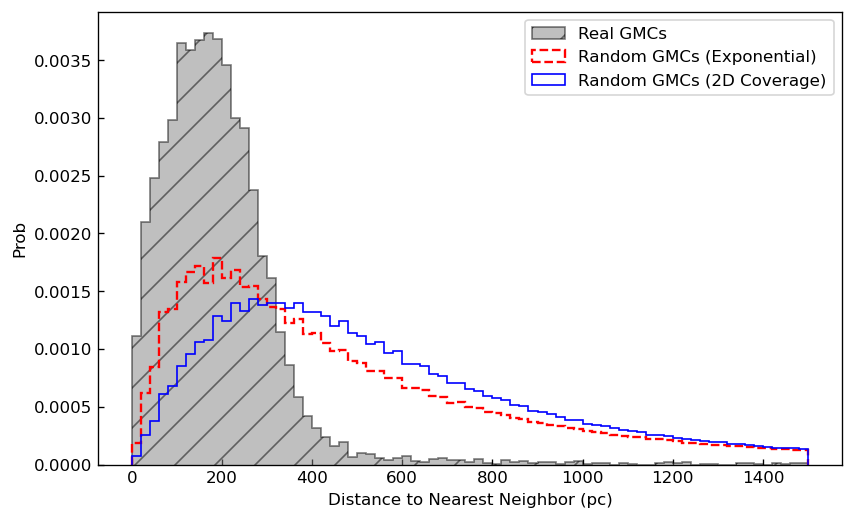

In [40]:
bins = np.linspace(0,1500, 76)
plt.figure(dpi=120, figsize=(8,5))
plt.hist(real_first, bins=bins, density=True, histtype='step', facecolor='grey', hatch='/', edgecolor='black', alpha=0.5, fill=True, label='Real GMCs')
plt.hist(exp_first, bins=bins, density=True, label='Random GMCs (Exponential)', linewidth=1.4, ls='--' ,histtype='step', edgecolor='red')
plt.hist(cov_first, bins=bins, density=True, histtype='step', edgecolor='blue', alpha=1, label='Random GMCs (2D Coverage)')
plt.legend()
plt.ylabel('Prob')
plt.xlabel('Distance to Nearest Neighbor (pc)')
plt.tick_params(direction='in')


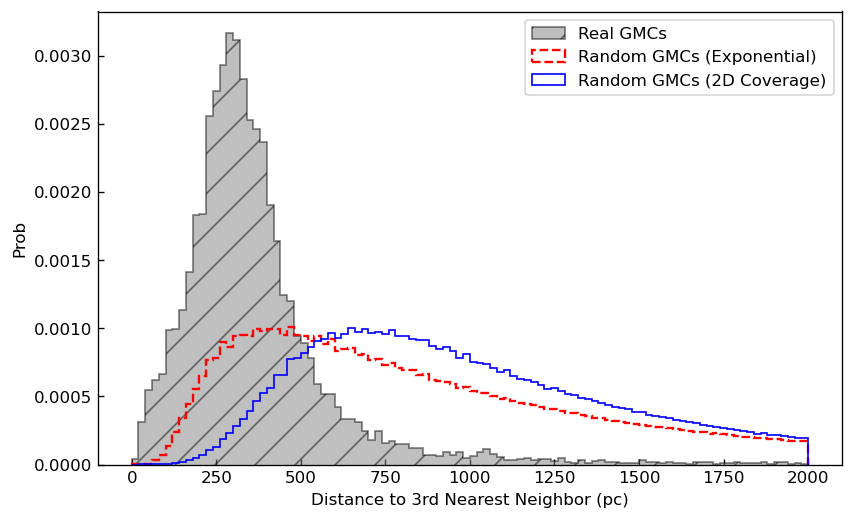

In [41]:
bins = np.linspace(0,2000, 101)
plt.figure(dpi=120, figsize=(8,5))
plt.hist(real_third, bins=bins, density=True, histtype='step', facecolor='grey', hatch='/', edgecolor='black', alpha=0.5, fill=True, label='Real GMCs')
plt.hist(exp_third, bins=bins, density=True, label='Random GMCs (Exponential)', linewidth=1.4, ls='--' ,histtype='step', edgecolor='red')
plt.hist(cov_third, bins=bins, density=True, histtype='step', edgecolor='blue', alpha=1, label='Random GMCs (2D Coverage)')
plt.legend()
plt.ylabel('Prob')
plt.xlabel('Distance to 3rd Nearest Neighbor (pc)')
plt.tick_params(direction='in')

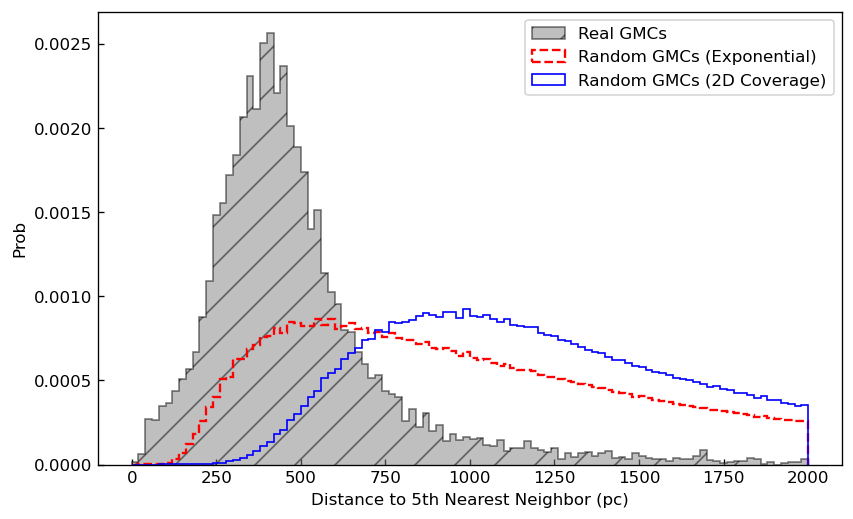

In [42]:
bins = np.linspace(0,2000, 101)
plt.figure(dpi=120, figsize=(8,5))
plt.hist(real_fifth, bins=bins, density=True, histtype='step', facecolor='grey', hatch='/', edgecolor='black', alpha=0.5, fill=True, label='Real GMCs')
plt.hist(exp_fifth, bins=bins, density=True, label='Random GMCs (Exponential)', linewidth=1.4, ls='--' ,histtype='step', edgecolor='red')
plt.hist(cov_fifth, bins=bins, density=True, histtype='step', edgecolor='blue', alpha=1, label='Random GMCs (2D Coverage)')
plt.legend()
plt.ylabel('Prob')
plt.xlabel('Distance to 5th Nearest Neighbor (pc)')
plt.tick_params(direction='in')

# 50pc Bins

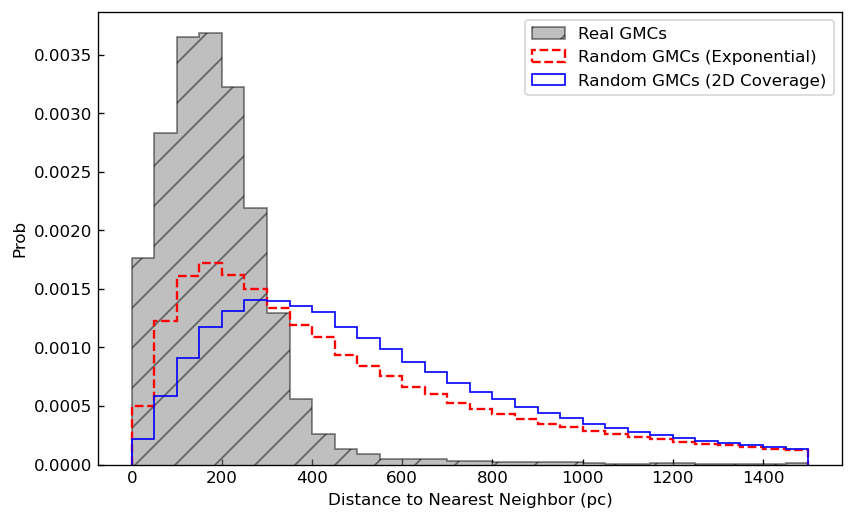

In [43]:
bins = np.linspace(0,1500, 31)
plt.figure(dpi=120, figsize=(8,5))
plt.hist(real_first, bins=bins, density=True, histtype='step', facecolor='grey', hatch='/', edgecolor='black', alpha=0.5, fill=True, label='Real GMCs')
plt.hist(exp_first, bins=bins, density=True, label='Random GMCs (Exponential)', linewidth=1.4, ls='--' ,histtype='step', edgecolor='red')
plt.hist(cov_first, bins=bins, density=True, histtype='step', edgecolor='blue', alpha=1, label='Random GMCs (2D Coverage)')
plt.legend()
plt.ylabel('Prob')
plt.xlabel('Distance to Nearest Neighbor (pc)')
plt.tick_params(direction='in')

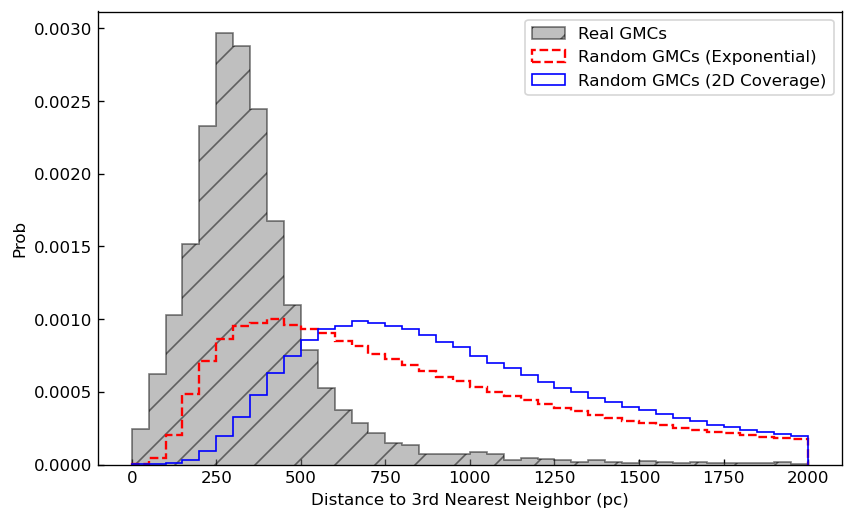

In [44]:
bins = np.linspace(0,2000, 41)
plt.figure(dpi=120, figsize=(8,5))
plt.hist(real_third, bins=bins, density=True, histtype='step', facecolor='grey', hatch='/', edgecolor='black', alpha=0.5, fill=True, label='Real GMCs')
plt.hist(exp_third, bins=bins, density=True, label='Random GMCs (Exponential)', linewidth=1.4, ls='--' ,histtype='step', edgecolor='red')
plt.hist(cov_third, bins=bins, density=True, histtype='step', edgecolor='blue', alpha=1, label='Random GMCs (2D Coverage)')
plt.legend()
plt.ylabel('Prob')
plt.xlabel('Distance to 3rd Nearest Neighbor (pc)')
plt.tick_params(direction='in')

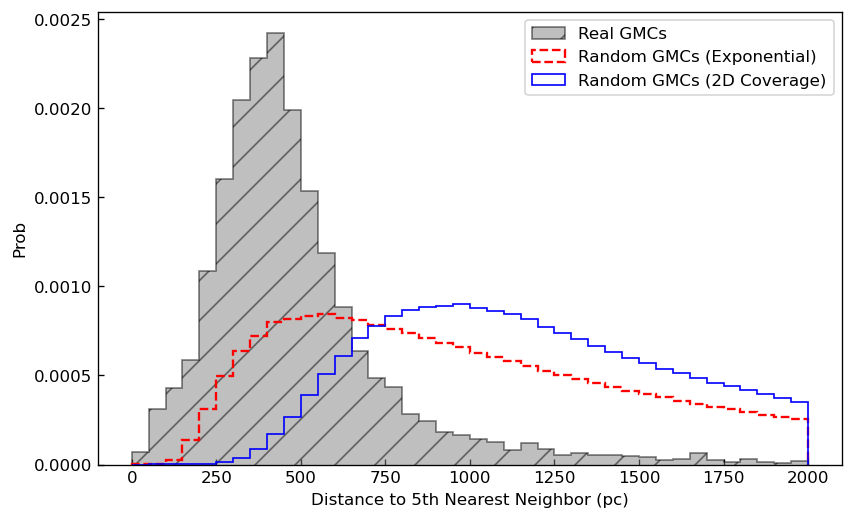

In [45]:
bins = np.linspace(0,2000, 41)
plt.figure(dpi=120, figsize=(8,5))
plt.hist(real_fifth, bins=bins, density=True, histtype='step', facecolor='grey', hatch='/', edgecolor='black', alpha=0.5, fill=True, label='Real GMCs')
plt.hist(exp_fifth, bins=bins, density=True, label='Random GMCs (Exponential)', linewidth=1.4, ls='--' ,histtype='step', edgecolor='red')
plt.hist(cov_fifth, bins=bins, density=True, histtype='step', edgecolor='blue', alpha=1, label='Random GMCs (2D Coverage)')
plt.legend()
plt.ylabel('Prob')
plt.xlabel('Distance to 5th Nearest Neighbor (pc)')
plt.tick_params(direction='in')

In [7]:
print('REAL GMCs:')
print('first, third, fifth:')
print(np.nanmean(real_first))
print(np.nanmean(real_third))
print(np.nanmean(real_fifth))
print()
print('2D COVERAGE GMCs:')
print('first, third, fifth:')
print(np.nanmean(cov_first))
print(np.nanmean(cov_third))
print(np.nanmean(cov_fifth))
print()
print('EXPONENTIAL GMCs:')
print('first, third, fifth:')
print(np.nanmean(exp_first))
print(np.nanmean(exp_third))
print(np.nanmean(exp_fifth))

REAL GMCs:
first, third, fifth:
195.7292362707462
377.9066105042639
520.0223901455756

2D COVERAGE GMCs:
first, third, fifth:
664.271025164422
1297.8604119086006
1759.1799582524102

EXPONENTIAL GMCs:
first, third, fifth:
598.9206635305238
1106.833710358948
1449.781649167429


In [47]:
len(sources)

66

In [58]:
res = 150
used = []
for i in range(len(sources)):
    real_data = '/home/machado.35/projects/intro/sources/'+sources[i]+'/'+sources[i]+'_'+str(res)+'pc_cloud_stats.csv'
    rand_2d = fp+sources[i]+'_2dcov'+'_'+str(res)+'pc.csv'
    rand_exp = fp+sources[i]+'_exp'+'_'+str(res)+'pc.csv'
    if os.path.isfile(real_data) and os.path.isfile(rand_exp):
        used.append(str(sources[i]))
print(len(used))

61


In [60]:
list(set(sources) - set(used))

['ngc0253', 'ngc5068', 'circinus', 'ngc4731', 'ngc4571']

In [72]:
ls /home/machado.35/projects/intro/sources/ngc5068

ngc5068_12m+7m+tp_co21_120pc_props.fits.bz2  ngc5068_60pc_cloud_stats.csv
ngc5068_12m+7m+tp_co21_150pc_props.fits.bz2  ngc5068_90pc_cloud_stats.csv
ngc5068_12m+7m+tp_co21_60pc_props.fits.bz2   ngc5068_stats.csv
ngc5068_12m+7m+tp_co21_90pc_props.fits.bz2
